<a href="https://colab.research.google.com/github/ToluSh/ISE326-Ass/blob/main/TS_HW5_Unsupervised_Learning_Exercise.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# HW5 - Unsupervised Learning Exercise

Maximum Number of points: 100

Questions 1-20 (5 points per question)

## Import Libraries

In [225]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
%matplotlib inline

## Create some Data

In [226]:
from sklearn.datasets import make_blobs

make_blobs is a function in scikit-learn that is often used to generate synthetic datasets for clustering and classification tasks. Specifically, make_blobs creates a dataset consisting of multiple clusters of data points, each cluster representing a different class or group.

Let's generate a dataset of 200 data points, each with 2 features, distributed into four clusters with some variability determined by the cluster_std parameter. The cluster_std parameter controls the standard deviation of each cluster. A higher value results in more spread-out clusters, while a lower value makes the clusters more compact. In our case, the standard deviation is set to 1.8.

In [227]:
data = make_blobs(n_samples=200, n_features=2,
                           centers=4, cluster_std=1.8,random_state=101)

In [228]:
data

(array([[-6.42884095e+00,  1.01411174e+01],
        [ 5.86867888e+00,  5.20110356e+00],
        [-3.76109375e-01,  3.26427943e+00],
        [ 2.16679181e+00,  9.56300522e+00],
        [ 5.09508570e+00,  7.20752718e+00],
        [-1.08788882e+01, -6.11318040e+00],
        [ 2.03405554e+00,  9.76664755e+00],
        [-1.71798771e+00,  1.41401140e+00],
        [ 1.16911341e+00,  8.24556988e+00],
        [-1.35185444e+00,  3.13245345e+00],
        [-6.18548214e+00,  9.67406555e+00],
        [-1.19856602e+00,  2.50408937e+00],
        [ 2.90296863e+00,  7.91251003e+00],
        [ 2.39250023e+00,  5.38173971e+00],
        [-5.27545147e+00,  9.63836659e+00],
        [-5.66814687e-01,  5.60262755e-02],
        [ 5.97336628e+00,  5.87172022e+00],
        [-2.31355268e+00,  5.23980092e-01],
        [-1.01344756e+01, -3.43130837e+00],
        [-4.54082629e+00,  1.13920174e+01],
        [-1.04155833e+01, -5.67545836e+00],
        [ 6.64796693e-01,  9.42304718e-02],
        [ 2.11460477e+00,  3.559

## Visualize Data

1. Draw a scatterplot of the data

<function matplotlib.pyplot.show(close=None, block=None)>

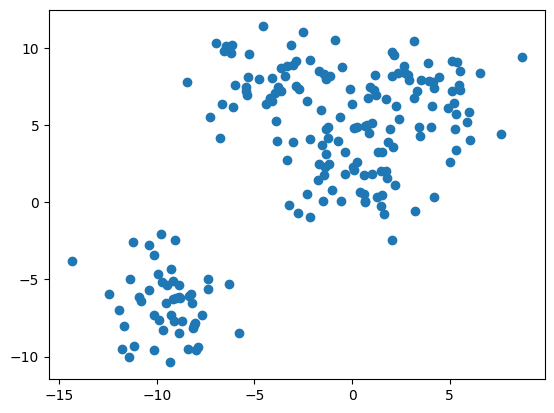

In [229]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
data = make_blobs(n_samples=200, n_features=2,
                          centers=4, cluster_std=1.8,random_state=101)
plt.scatter(data[0][:,0],data[0][:,1])
plt.show


2. Draw a scatterplot of the data by using different colors for each of the four classes, which are stored in data[1]. You can set the color map as follows: cmap='rainbow'

<function matplotlib.pyplot.show(close=None, block=None)>

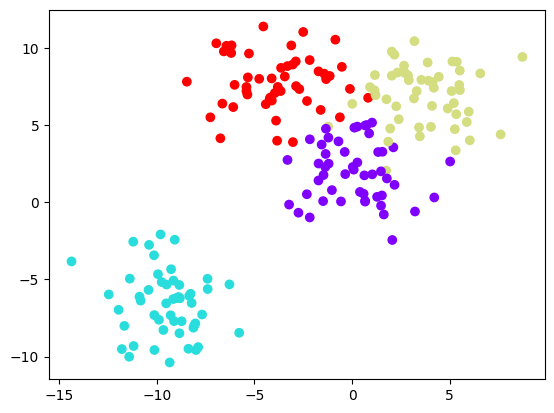

In [29]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
data = make_blobs(n_samples=200, n_features=2,
                          centers=4, cluster_std=1.8,random_state=101)
plt.scatter(data[0][:,0],data[0][:,1], c= data[1], cmap = 'rainbow')
plt.show

Let's create a dataframe.

In [230]:
df = pd.DataFrame(data[0], columns=['Feature1', 'Feature2'])

In [231]:
df

,Feature1,Feature2
0,-6.428841,10.141117
1,5.868679,5.201104
2,-0.376109,3.264279
3,2.166792,9.563005
4,5.095086,7.207527
...,...,...
195,0.671402,4.975115
196,6.560002,8.351321
197,5.134971,9.125419
198,-9.261985,-4.336104


# Principal Components Analysis

3. Print the variances for each column in the 'df' DataFrame

In [32]:
import pandas as pd
df = pd.DataFrame(data[0], columns=['Feature1', 'Feature2'])
df.var()

Feature1    27.324264
Feature2    36.163142
dtype: float64

4. After importing StandardScaler() from the sklearn.preprocessing package, use the fit_transform() method to fit the scaler, which computes the necessary means and standard deviations, and apply it to the data. Assign the transformed df to the 'df_scaled' variable.

In [38]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [39]:
scaler.fit(df)
df_scaled = scaler.transform(df)


In [35]:
df_scaled

array([[-7.74096520e-01,  1.27068730e+00],
       [ 1.58438109e+00,  4.47149481e-01],
       [ 3.86725509e-01,  1.24266191e-01],
       [ 8.74415352e-01,  1.17431161e+00],
       [ 1.43601767e+00,  7.81635534e-01],
       [-1.62754802e+00, -1.43902757e+00],
       [ 8.48958550e-01,  1.20826033e+00],
       [ 1.29373614e-01, -1.84187539e-01],
       [ 6.83075780e-01,  9.54685135e-01],
       [ 1.99592419e-01,  1.02289800e-01],
       [-7.27423994e-01,  1.19282621e+00],
       [ 2.28990811e-01, -2.46326446e-03],
       [ 1.01560289e+00,  8.99161528e-01],
       [ 9.17702800e-01,  4.77262898e-01],
       [-5.52893927e-01,  1.18687492e+00],
       [ 3.50151125e-01, -4.10573971e-01],
       [ 1.60445855e+00,  5.58946370e-01],
       [ 1.51532948e-02, -3.32562516e-01],
       [-1.48478099e+00, -9.91939137e-01],
       [-4.12003971e-01,  1.47922183e+00],
       [-1.53869317e+00, -1.36605598e+00],
       [ 5.86355490e-01, -4.04205041e-01],
       [ 8.64406670e-01,  1.73462512e-01],
       [-1.

Having scaled the data, we can now perform principal components analysis.

5. After importing PCA from the sklearn.decomposition package, create an object of the class PCA and call the fit() method. Check that the means of the features are approximately 0 by inspecting the 'mean_' attribute. Print the principal component loading vectors by inspecting the 'components_' attribute. Compute the scores using the transform() method and assign them to the 'scores' variable.

In [40]:
from sklearn.decomposition import PCA

In [41]:
pcad = PCA()

In [42]:
pcad.fit(df_scaled)

PCA()

In [44]:
pcad.mean_

array([-2.54241073e-16,  9.40914013e-17])

In [45]:
pcad.components_

array([[-0.70710678, -0.70710678],
       [-0.70710678,  0.70710678]])

In [46]:
scores = pcad.transform(df_scaled)

In [47]:
scores

array([[-3.51142707e-01,  1.44588050e+00],
       [-1.43650905e+00, -8.04144185e-01],
       [-3.61325696e-01, -1.85586763e-01],
       [-1.44866873e+00,  2.12058677e-01],
       [-1.56811762e+00, -4.62718043e-01],
       [ 2.16839640e+00,  1.33304092e-01],
       [-1.45467342e+00,  2.54064727e-01],
       [ 3.87592977e-02, -2.21721218e-01],
       [-1.15807185e+00,  1.92056816e-01],
       [-2.13462964e-01, -6.88033414e-02],
       [-3.29089063e-01,  1.35782194e+00],
       [-1.60179164e-01, -1.63662746e-01],
       [-1.35394290e+00, -8.23364757e-02],
       [-9.86389705e-01, -3.11438041e-01],
       [-4.48292261e-01,  1.23020235e+00],
       [ 4.27254042e-02, -5.37913874e-01],
       [-1.52975829e+00, -7.39288749e-01],
       [ 2.24442213e-01, -2.45872208e-01],
       [ 1.75130560e+00,  3.48491818e-01],
       [-7.54636983e-01,  1.33729859e+00],
       [ 2.05396782e+00,  1.22072930e-01],
       [-1.28799818e-01, -7.00432069e-01],
       [-7.33884336e-01, -4.88571299e-01],
       [ 2.

6. The biplot is a common visualization method used with PCA. Make a biplot for our dataset. You can draw inspiration from the Unsupervised Learning notebook uploaded to CourseSite.

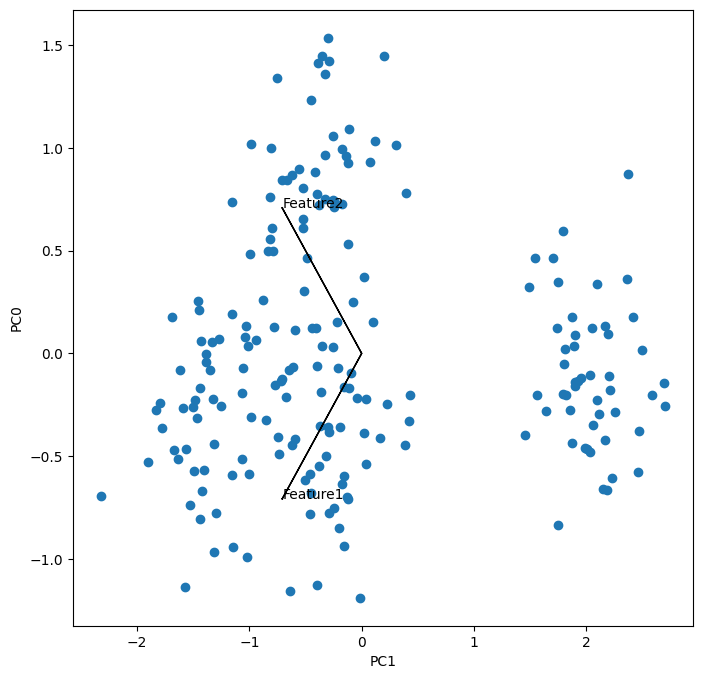

In [52]:
i, j = 0, -1 # which components
fig, ax = plt.subplots(1, 1, figsize=(8, 8))
ax.scatter(scores[:,0], scores[:,1])
ax.set_xlabel('PC%d' % (i+1))
ax.set_ylabel('PC%d' % (j+1))
for k in range(pcad.components_.shape[1]):
    ax.arrow(0, 0, pcad.components_[i,k], pcad.components_[j,k])
    ax.text(pcad.components_[i,k],
            pcad.components_[j,k],
            df.columns[k])

7. Compute the standard deviations, explained variances, and PVE of the principal component scores.

In [58]:
scores.std(0, ddof=1 )
print("The standard deviation is {}".format(scores.std(0, ddof = 1)))

The standard deviation is [1.28625909 0.59631183]


In [56]:
pcad.explained_variance_
print("The explained variances are {}".format(pcad.explained_variance_))

The explained variances are [1.65446245 0.3555878 ]


In [59]:
print("PVE: {}".format(pcad.explained_variance_ratio_))

PVE: [0.82309507 0.17690493]


8. Plot the PVE explained by each component

<function matplotlib.pyplot.show(close=None, block=None)>

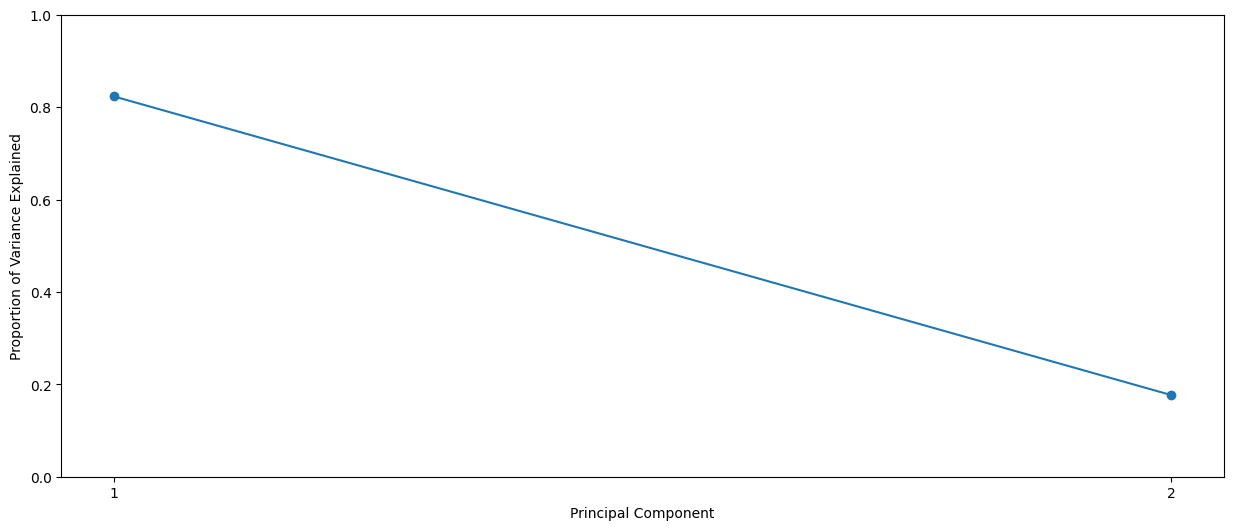

In [98]:
import numpy as np
ticks = np.arange(pcad.n_components_)+1
plt_1 = plt.figure(figsize=(15, 6))
plt.plot(ticks, pcad.explained_variance_ratio_, marker='o')
plt.xlabel('Principal Component')
plt.ylabel('Proportion of Variance Explained')
plt.ylim([0,1])
plt.xticks(ticks)
plt.show


9. Plot the cumulative PVE

<function matplotlib.pyplot.show(close=None, block=None)>

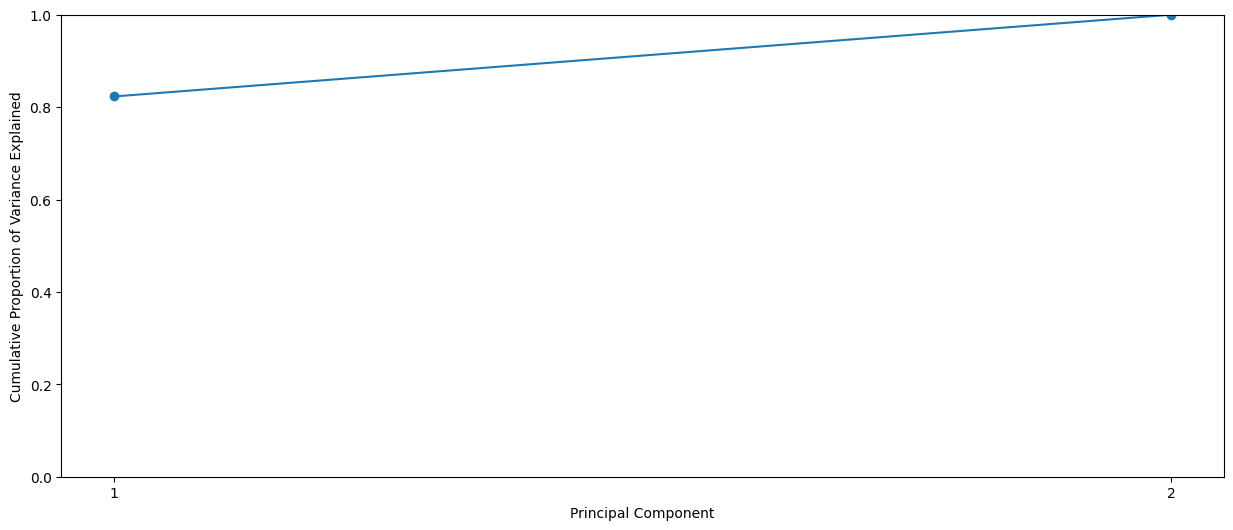

In [97]:
import numpy as np
ticks = np.arange(pcad.n_components_)+1
plt_1 = plt.figure(figsize=(15, 6))
plt.plot(ticks, pcad.explained_variance_ratio_.cumsum(), marker='o')
plt.xlabel('Principal Component')
plt.ylabel('Cumulative Proportion of Variance Explained')
plt.ylim([0,1])
plt.xticks(ticks)
plt.show

# K-Means Clustering

K-Means Clustering is an unsupervised learning method that tries to cluster data based on their similarity. Unsupervised learning means that there is no outcome to be predicted, and the algorithm just tries to find patterns in the data. In k-means clustering, we have to specify the number of clusters we want the data to be grouped into. The k-means algorithm randomly assigns each observation to a cluster, and finds the centroid of each cluster. Then, the algorithm iterates through two steps:
Reassign data points to the cluster whose centroid is closest. Calculate new centroid of each cluster. These two steps are repeated till the within cluster variation cannot be reduced any further. The within cluster variation is calculated as the sum of the euclidean distance between the data points and their respective cluster centroids.

## Creating the Clusters

In [232]:
from sklearn.cluster import KMeans

In [233]:
df = pd.DataFrame(data[0], columns=['Feature1', 'Feature2'])
labels = data[1]
df

,Feature1,Feature2
0,-6.428841,10.141117
1,5.868679,5.201104
2,-0.376109,3.264279
3,2.166792,9.563005
4,5.095086,7.207527
...,...,...
195,0.671402,4.975115
196,6.560002,8.351321
197,5.134971,9.125419
198,-9.261985,-4.336104


10. We want to perform $K$-means clustering with $K=4$. Create an object of the class KMeans and fit it to df by running the algorithm 30 times with random initial cluster assignments. Set random_state=5

In [100]:
from sklearn.cluster import KMeans
df = pd.DataFrame(data[0], columns=['Feature1', 'Feature2'])
kmeans = KMeans(n_clusters=4,
                random_state=5,
                n_init=30).fit(df)

In [101]:
kmeans = KMeans(n_clusters=4,
                random_state=5,
                n_init=30).fit(df)

11. Print the cluster centers (you can access the cluster centers from the 'cluster_centers_' attribute) and cluster labels.

In [103]:
kmeans.cluster_centers_

array([[ 3.71749226,  7.01388735],
       [-0.0123077 ,  2.13407664],
       [-9.46941837, -6.56081545],
       [-4.13591321,  7.95389851]])

In [104]:
kmeans.labels_

array([3, 0, 1, 0, 0, 2, 0, 1, 0, 1, 3, 1, 0, 0, 3, 1, 0, 1, 2, 3, 2, 1,
       1, 2, 3, 2, 2, 1, 0, 0, 3, 2, 0, 1, 1, 3, 2, 2, 2, 1, 2, 3, 3, 3,
       1, 0, 3, 1, 2, 1, 1, 3, 0, 1, 2, 3, 1, 1, 3, 0, 2, 0, 2, 3, 0, 1,
       2, 0, 0, 2, 0, 1, 2, 1, 2, 0, 0, 1, 3, 1, 1, 2, 0, 2, 1, 1, 1, 3,
       1, 2, 2, 2, 2, 1, 1, 2, 0, 3, 2, 0, 1, 2, 1, 1, 0, 1, 2, 0, 2, 2,
       0, 3, 3, 0, 2, 0, 3, 3, 0, 3, 1, 3, 1, 3, 1, 0, 3, 1, 2, 3, 3, 3,
       1, 2, 2, 3, 0, 3, 0, 1, 2, 0, 2, 3, 3, 0, 1, 2, 3, 3, 3, 3, 1, 0,
       1, 3, 0, 0, 0, 1, 0, 1, 1, 3, 2, 3, 1, 0, 3, 1, 0, 1, 3, 0, 1, 3,
       0, 0, 2, 0, 3, 2, 2, 3, 2, 2, 2, 2, 2, 1, 2, 0, 0, 3, 2, 1, 0, 0,
       2, 1], dtype=int32)

Here the observations can be easily plotted because they are two-dimensional.

12. Create two plots, side by side. The first plot represents the data with each observation colored according to the K-means cluster assignment. The second plot represents the data with each observation colored according to the original cluster assignment.

Text(0.5, 1.0, 'Original')

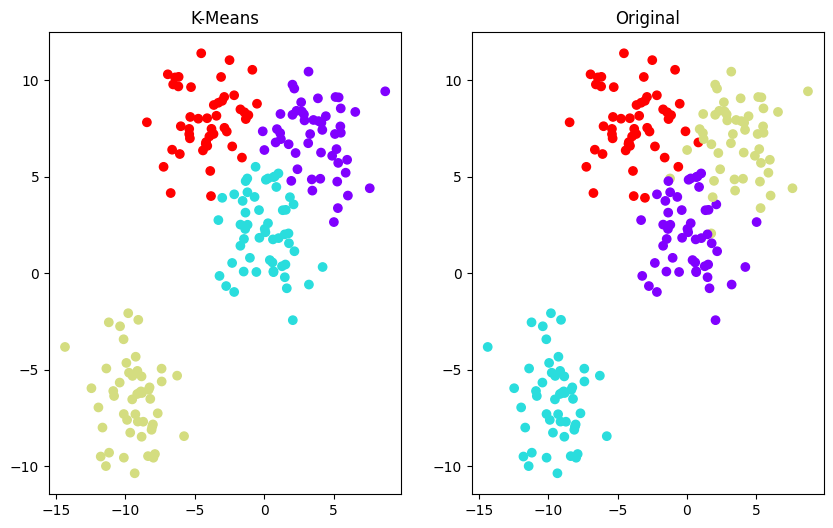

In [114]:
fig, axes = plt.subplots(1, 2, figsize=(10,6))
axes[0].scatter(data[0][:,0], data[0][:,1], c=kmeans.labels_, cmap ='rainbow')
axes[0].set_title("K-Means")
axes[1].scatter(data[0][:,0],data[0][:,1], c=data[1], cmap = 'rainbow')
axes[1].set_title("Original")

13. Do you think that K-means did a good job in identifying the clusters?

In [234]:
# Write your answer here yes, it did a good job even though a few datapoints weren't captured in the correct clusters.

In this example, we knew that there really were four clusters because we generated the data. However, for real data, we do not know the true number of clusters, nor whether they exist in any precise way.

14. Perform K-means clustering with K=2, K=3, K=4, K=5, K=10 (you can set random_state=5 and you can still use 30 initial random cluster assignments). Print the total within-cluster sum of squares obtained for each value of K.

In [117]:
kmeans2 = KMeans(n_clusters=2,
                random_state=5,
                n_init=30).fit(df)
print("The total within-cluster sum of squares when K=2 is {}".format(kmeans2.inertia_))

The total within-cluster sum of squares when K=2 is 3799.1629099413412


In [119]:
kmeans3 = KMeans(n_clusters=3,
                random_state=5,
                n_init=30).fit(df)
print("The total within-cluster sum of squares when K=3 is {}".format(kmeans3.inertia_))

The total within-cluster sum of squares when K=3 is 2288.056530389742


In [120]:
kmeans4 = KMeans(n_clusters=4,
                random_state=5,
                n_init=30).fit(df)
print("The total within-cluster sum of squares when K=4 is {}".format(kmeans4.inertia_))

The total within-cluster sum of squares when K=4 is 1318.4035725547487


In [121]:
kmeans5 = KMeans(n_clusters=5,
                random_state=5,
                n_init=30).fit(df)
print("The total within-cluster sum of squares when K=5 is {}".format(kmeans5.inertia_))

The total within-cluster sum of squares when K=5 is 1133.2102712291312


In [122]:
kmeans10 = KMeans(n_clusters=10,
                random_state=5,
                n_init=30).fit(df)
print("The total within-cluster sum of squares when K=10 is {}".format(kmeans10.inertia_))

The total within-cluster sum of squares when K=10 is 598.9922748428314


15. Again, create two plots, side by side. The first plot represents the data with each observation colored according to the K-means cluster assignment for K=10. The second plot represents the data with each observation colored according to the original cluster assignment.

Text(0.5, 1.0, 'Original')

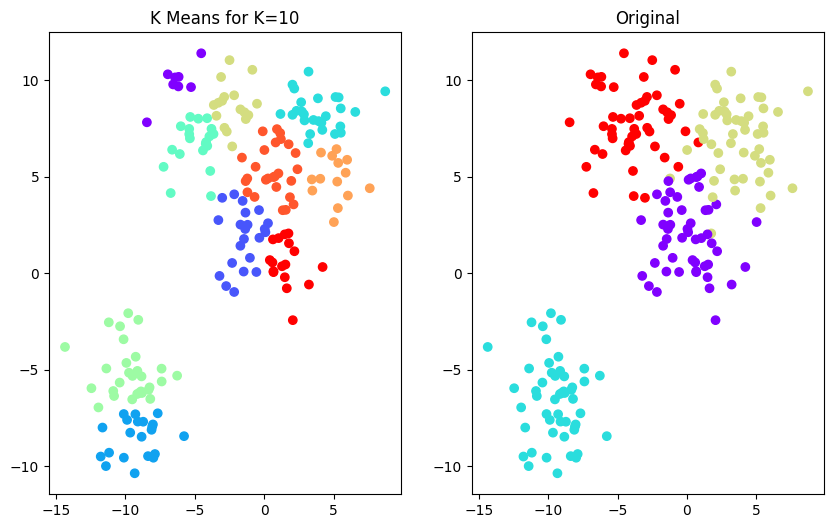

In [123]:
fig, axes = plt.subplots(1, 2, figsize=(10,6))
axes[0].scatter(data[0][:,0], data[0][:,1], c=kmeans10.labels_, cmap ='rainbow')
axes[0].set_title("K Means for K=10")
axes[1].scatter(data[0][:,0],data[0][:,1], c=data[1], cmap = 'rainbow')
axes[1].set_title("Original")

16. Based on the results that you got for Question 14, do you think that the total within-cluster sum of squares is a good measure to determine the best value of K?

In [235]:
# Write your answer here WCSS is not used to directly determine the best value of K, it can be a valuable tool in conjunction with the Elbow Method to help identify a reasonable and effective number of clusters for a given dataset.

# Hierarchical Clustering

In [124]:
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, cut_tree

As explained in the 'Unsupervised Learning' Python Notebook, the compute_linkage() function below can be used to plot dendrograms.

In [ ]:
def compute_linkage(hclust):
    """

    Create linkage matrix used to plot a dendrogram

    Follows [sklearn example](https://scikit-learn.org/stable/auto_examples/cluster/plot_agglomerative_dendrogram.html)

    Parameters
    ----------

    hclust : `sklearn.cluster.AgglomerativeClustering`
        Fitted hierarchical clustering object.

    Returns
    -------

    linkage_matrix : np.ndarray
        Array to be passed to `dendrogram` from `scipy.cluster.hierarchy`.

    """

    counts = np.zeros(hclust.children_.shape[0])
    n_samples = len(hclust.labels_)
    for i, merge in enumerate(hclust.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack([hclust.children_, hclust.distances_,
                                      counts]).astype(float)
    return linkage_matrix

17. Use df to plot the hierarchical clustering dendrogram using single, average, and complete linkage clustering with Euclidean distance as the dissimilarity measure (which is the default metric).

In [126]:
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, cut_tree
HClust = AgglomerativeClustering
hc_avg = HClust(distance_threshold=0,
                 n_clusters=None,
                 linkage='average')
hc_avg.fit(df)

AgglomerativeClustering(distance_threshold=0, linkage='average',
                        n_clusters=None)

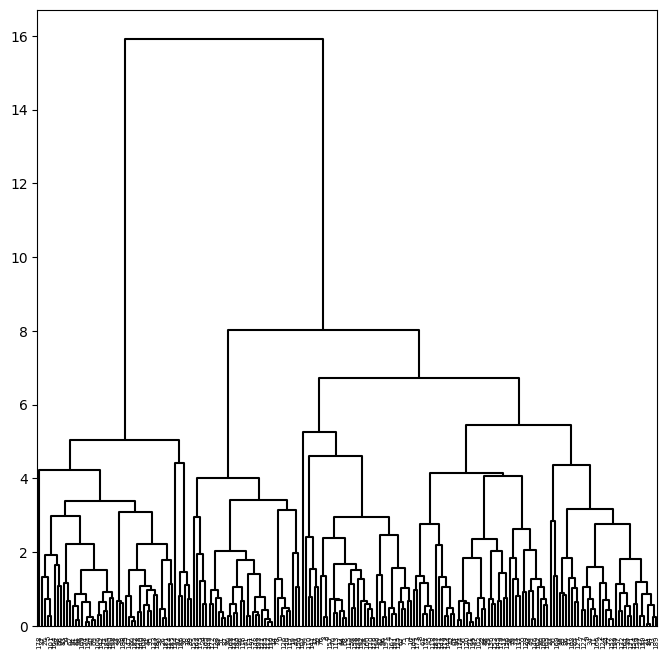

In [146]:
from scipy.cluster.hierarchy import dendrogram, linkage
cargs = {'color_threshold':-np.inf,
         'above_threshold_color':'black'}
fig, ax = plt.subplots(1, 1, figsize=(8, 8))
linkage_comp = linkage(df, "average")
dendrogram(linkage_comp,
           ax=ax,
           **cargs);

In [147]:
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, cut_tree
HClust = AgglomerativeClustering
hc_sing = HClust(distance_threshold=0,
                 n_clusters=None,
                 linkage='single')
hc_sing.fit(df)

AgglomerativeClustering(distance_threshold=0, linkage='single', n_clusters=None)

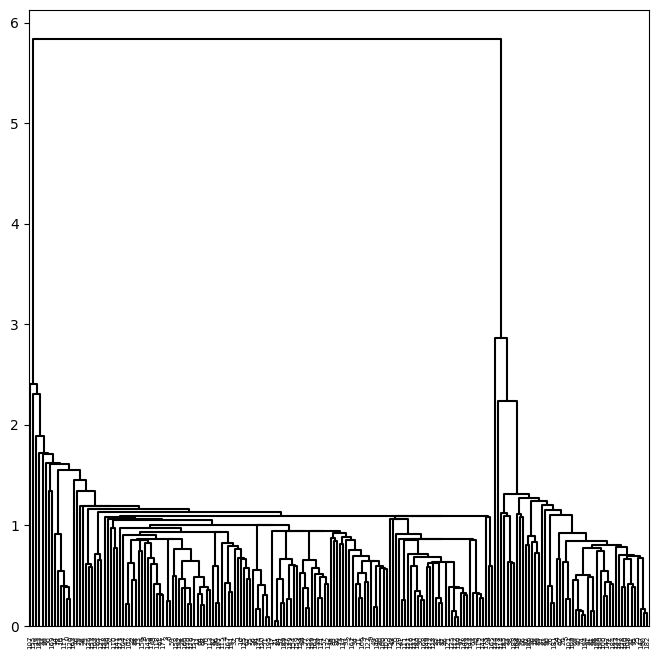

In [237]:
from scipy.cluster.hierarchy import dendrogram, linkage
cargs = {'color_threshold':-np.inf,
         'above_threshold_color':'black'}
fig, ax = plt.subplots(1, 1, figsize=(8, 8))
linkage_sing = linkage(df, "single")
dendrogram(linkage_sing,
           ax=ax,
           **cargs);

In [143]:
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, cut_tree
HClust = AgglomerativeClustering
hc_comp = HClust(distance_threshold=0,
                 n_clusters=None,
                 linkage='complete')
hc_comp.fit(df)

AgglomerativeClustering(distance_threshold=0, linkage='complete',
                        n_clusters=None)

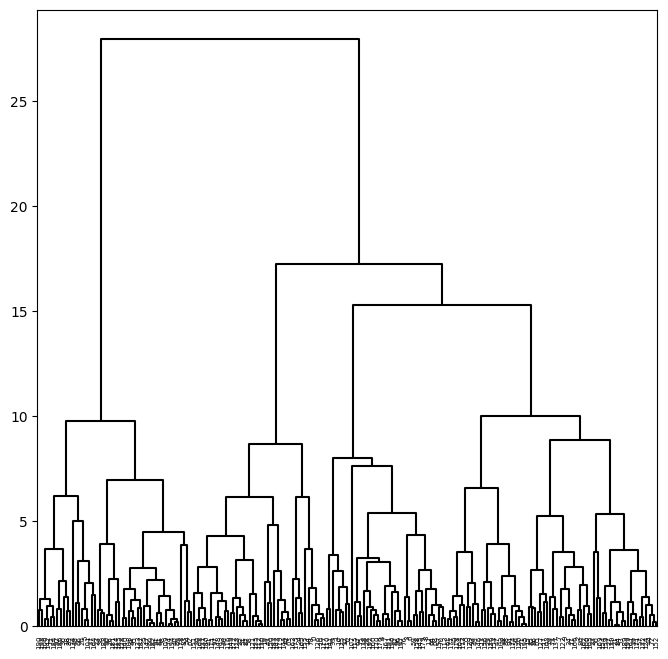

In [149]:
from scipy.cluster.hierarchy import dendrogram, linkage
cargs = {'color_threshold':-np.inf,
         'above_threshold_color':'black'}
fig, ax = plt.subplots(1, 1, figsize=(8, 8))
linkage_compp = linkage(df, "complete")
dendrogram(linkage_compp,
           ax=ax,
           **cargs);

18. Let's use complete linkage. Change the 'color_threshold' to cut the tree at a height that results in a total number of clusters equal to 4. Color the links that merge above that height in blue. Plot the resulting hierarchical clustering dendrogram.

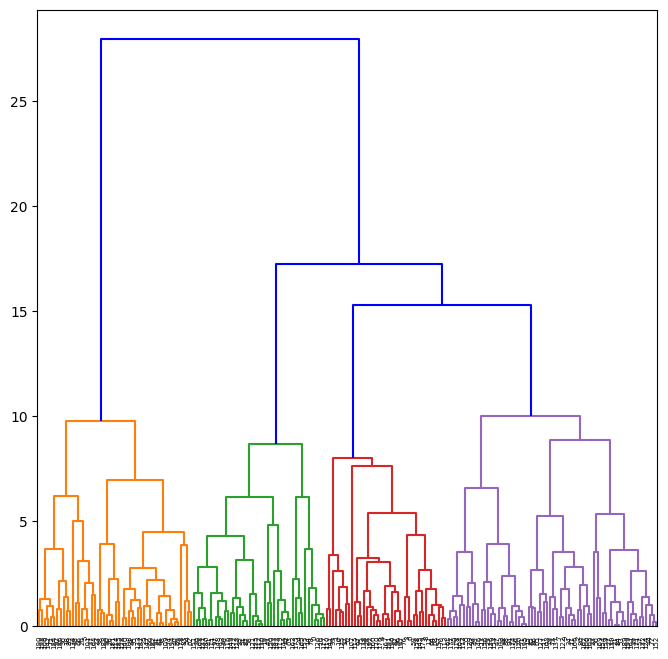

In [246]:
cargs = {'color_threshold':-np.inf,
         'above_threshold_color':'black'}
fig, ax = plt.subplots(1, 1, figsize=(8, 8))
linkage_compp = linkage(df, "complete")
dendrogram(linkage_compp,
           ax=ax,
           color_threshold = 11,
           above_threshold_color='blue');

# PCA and K-Means

Let's now generate a dataset of 200 data points, each with 4 features.

In [ ]:
data = make_blobs(n_samples=200, n_features=4,
                           centers=4, cluster_std=1.8,random_state=101)

In [ ]:
df = pd.DataFrame(data[0], columns=['Feature1', 'Feature2', 'Feature3', 'Feature4'])

Here the observations cannot be plotted because they are not two-dimensional. Since there are more than two features, we could instead perform PCA and plot the first two principal component score vectors to represent the clusters.

19. Perform the same steps as in Question 5. Remember to standardize the data. Compute the scores using the transform() method and assign them to the 'scores' variable. Make a biplot.

In [164]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_blobs
data_2 = make_blobs(n_samples=200, n_features=4,
                          centers=4, cluster_std=1.8,random_state=101)
df_2 = pd.DataFrame(data_2[0], columns=['Feature1', 'Feature2', 'Feature3', 'Feature4'])
scaler = StandardScaler()
scaler.fit(df_2)
df_2_scaled = scaler.transform(df_2)


In [165]:
pcad2 = PCA()

In [166]:
pcad2.fit(df_2_scaled)

PCA()

In [167]:
scores = pcad2.transform(df_2_scaled)

In [168]:
scores

array([[-5.32048574e-01,  2.64244433e-01,  1.35095022e+00,
        -1.41922079e-01],
       [-6.32386823e-01,  5.07273103e-01,  1.28961062e+00,
        -3.00036157e-01],
       [-4.21035079e-01,  5.17013661e-01,  1.29289715e+00,
         4.71299814e-01],
       [-7.57927082e-01,  1.41145993e+00, -5.98439784e-01,
         6.54713372e-02],
       [ 1.94632654e+00, -4.76176122e-01, -2.13494251e-01,
         7.22538124e-01],
       [-6.54466511e-01,  1.17016124e+00, -4.10511847e-01,
        -3.94564975e-01],
       [-8.12325476e-01,  1.84374628e+00, -9.85090319e-01,
         6.86257691e-01],
       [ 2.24004787e+00, -4.55127524e-01,  1.22340081e-01,
        -3.90915912e-02],
       [-9.89853904e-01,  1.19942168e+00, -5.37844389e-01,
         8.49363442e-01],
       [-9.68182745e-01,  8.06619527e-01,  1.27067197e+00,
         4.19854899e-01],
       [-1.26895488e+00, -1.53767045e+00, -4.13011621e-01,
         1.39817714e-01],
       [ 1.94978305e+00, -6.81643304e-01, -4.42752860e-01,
      

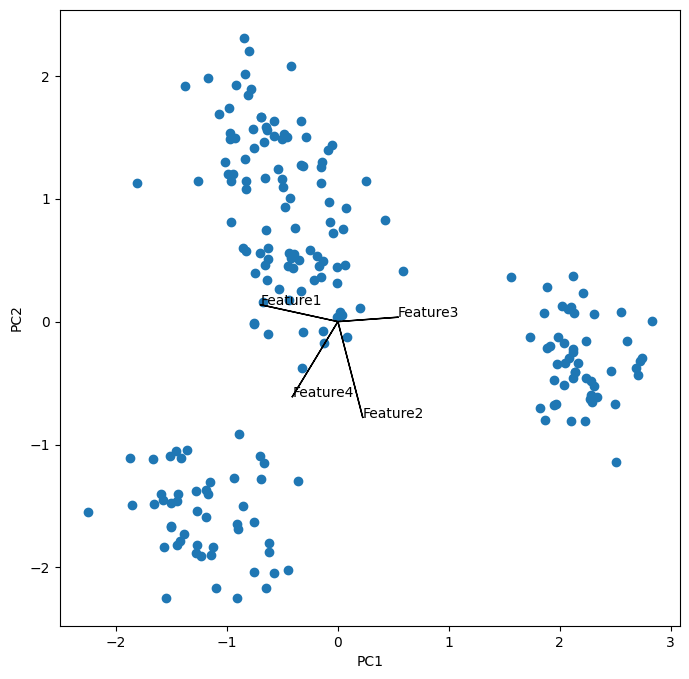

In [172]:
i, j = 0, 1 # which components
fig, ax = plt.subplots(1, 1, figsize=(8, 8))
ax.scatter(scores[:,0], scores[:,1])
ax.set_xlabel('PC%d' % (i+1))
ax.set_ylabel('PC%d' % (j+1))
for k in range(pcad2.components_.shape[1]):
    ax.arrow(0, 0, pcad2.components_[i,k], pcad2.components_[j,k])
    ax.text(pcad2.components_[i,k],
            pcad2.components_[j,k],
            df.columns[k])

20. Create a dataframe named 'df_scores' based on the first two columns of 'scores' and set the column names to 'PC1' and 'PC2' ('df_scores' is the low-dimensional representation of our original dataset). As in Question 10, we want to perform  𝐾-means clustering with 𝐾=4. Create an object of the class KMeans and fit it to df by running the algorithm 30 times with random initial cluster assignments. Set random_state=5. Plot the data with each observation colored according to the K-means cluster assignment.

In [202]:
from sklearn.cluster import KMeans
df_scores = pd.DataFrame(scores, columns = ['PC1','PC2','PC3', 'PC4'])
df_scores.drop(['PC3', 'PC4'], axis='columns', inplace=True)


In [203]:
df_scores

,PC1,PC2
0,-0.532049,0.264244
1,-0.632387,0.507273
2,-0.421035,0.517014
3,-0.757927,1.411460
4,1.946327,-0.476176
...,...,...
195,-0.652158,0.744316
196,-0.859411,-1.500219
197,-1.169021,-1.402312
198,0.020597,0.078108


In [204]:
from sklearn.cluster import KMeans

In [214]:
kmeans_2 = KMeans(n_clusters=4,
               random_state=5,
               n_init=30).fit(df_scores)

<function matplotlib.pyplot.show(close=None, block=None)>

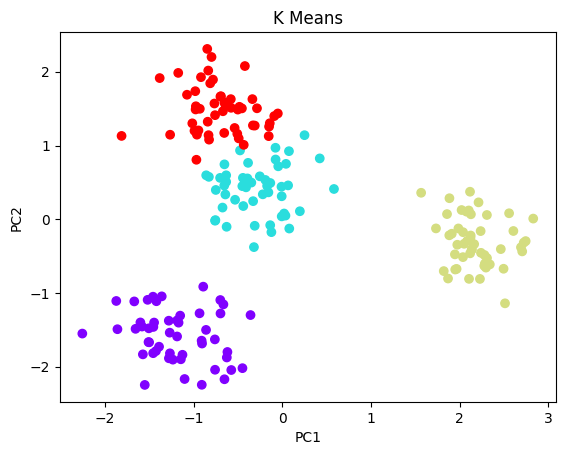

In [224]:
df_scores = pd.DataFrame(scores, columns = ['PC1','PC2','PC3', 'PC4'])
df_scores.drop(['PC3', 'PC4'], axis='columns', inplace=True)
plt.scatter(df_scores['PC1'], df_scores['PC2'], c=kmeans_2.labels_, cmap ='rainbow')
plt.title("K Means")
plt.xlabel('PC%d' % (i+1))
plt.ylabel('PC%d' % (j+1))
plt.show
